<a href="https://colab.research.google.com/github/Sripoojitha3/Unified-tasks/blob/main/Amazon_sales_data_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("Amazon Sales data.csv")

In [ ]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [ ]:
df.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [ ]:
df["Ship Date"]=pd.to_datetime(df["Ship Date"])
df["Order Date"]=pd.to_datetime(df["Order Date"])

In [ ]:
df.shape

(100, 14)

In [ ]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [ ]:
 df.groupby("Sales Channel").count()["Item Type"]

Sales Channel
Offline    50
Online     50
Name: Item Type, dtype: int64

<Axes: title={'center': 'Critical priority items'}, xlabel='Item Type'>

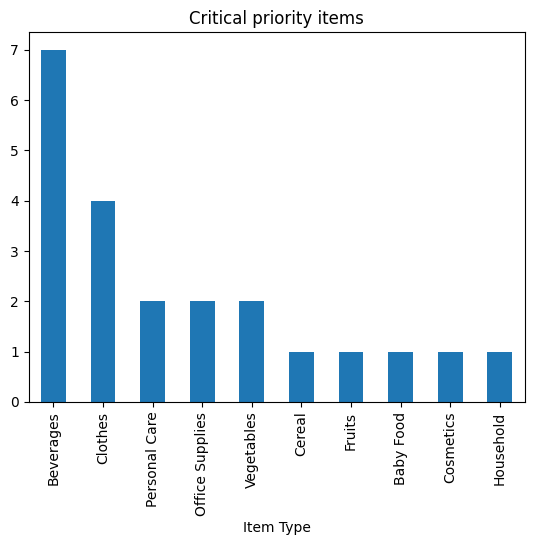

In [ ]:
df[df["Order Priority"]=="C"]["Item Type"].value_counts().plot(kind="bar",title="Critical priority items")

<Axes: title={'center': 'High priority items'}, xlabel='Item Type'>

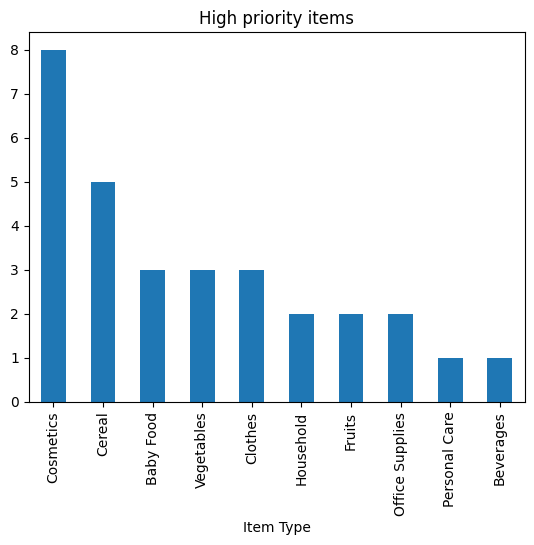

In [ ]:
df[df["Order Priority"]=="H"]["Item Type"].value_counts().plot(kind="bar",title="High priority items")

<Axes: title={'center': 'Medium priority items'}, xlabel='Item Type'>

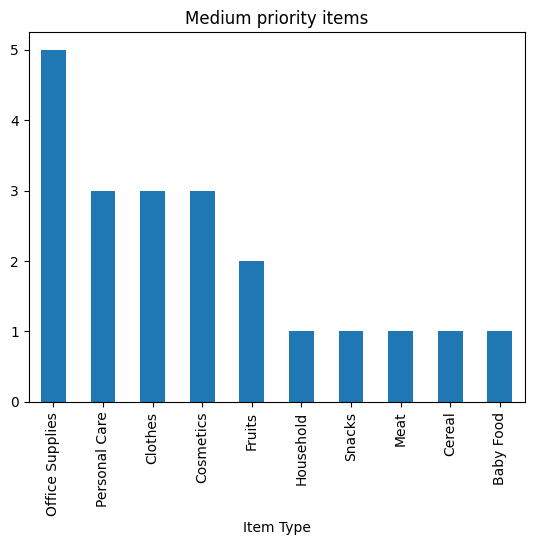

In [ ]:
df[df["Order Priority"]=="M"]["Item Type"].value_counts().plot(kind="bar",title="Medium priority items")

<Axes: title={'center': 'Low priority items'}, xlabel='Item Type'>

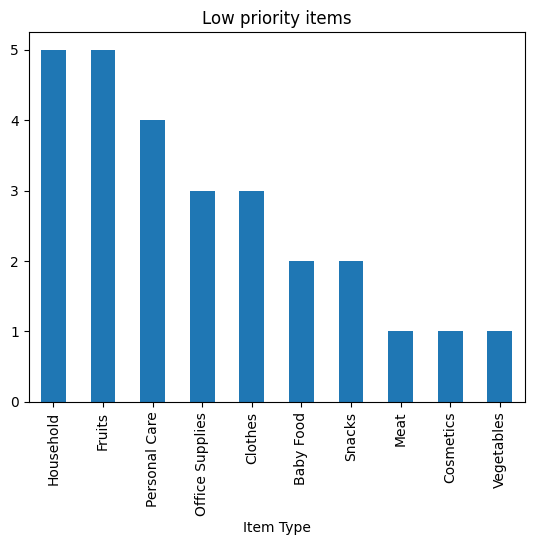

In [ ]:
df[df["Order Priority"]=="L"]["Item Type"].value_counts().plot(kind="bar",title="Low priority items")

Unique values present in data per column

In [ ]:
for i in df.columns:
  print(f"{i}:{len(df[i].unique())}")

Region:7
Country:76
Item Type:12
Sales Channel:2
Order Priority:4
Order Date:100
Order ID:100
Ship Date:99
Units Sold:99
Unit Price:12
Unit Cost:12
Total Revenue:100
Total Cost:100
Total Profit:100


In [ ]:
df.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

In [ ]:
max(df["Order Date"])

Timestamp('2017-05-22 00:00:00')

In [ ]:
min(df["Order Date"])

Timestamp('2010-02-02 00:00:00')

In [ ]:
df_amazon=df.copy()

In [ ]:
df_amazon.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

In [ ]:
df_amazon["Year"]=df_amazon["Ship Date"].dt.year
df_amazon["Month"]=df_amazon["Ship Date"].dt.month
df_amazon["Month-Year"]=df_amazon["Ship Date"].dt.strftime("%m-%y")
df_amazon["Unit Margin"]=df_amazon["Unit Price"]-df_amazon["Unit Cost"]
df_amazon["Total Sales"]=df_amazon["Units Sold"]*df_amazon["Unit Price"]

In [ ]:
df_amazon

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month,Month-Year,Unit Margin,Total Sales
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,6,06-10,95.86,2533654.00
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,9,09-12,88.59,576782.80
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,05-14,126.25,1158502.59
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,7,07-14,2.41,75591.66
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,02-13,126.25,3296425.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72,2011,9,09-11,73.44,97040.64
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47,2011,12,12-11,2.41,58471.11
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05,2016,6,06-16,63.13,228779.10
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02,2015,8,08-15,25.06,471336.91


In [ ]:
df_amazon[df_amazon["Unit Margin"]==max(df_amazon["Unit Margin"])]["Item Type"].unique()

array(['Cosmetics'], dtype=object)

In [ ]:
df_amazon[df_amazon["Unit Margin"]==min(df_amazon["Unit Margin"])]["Item Type"].unique()

array(['Fruits'], dtype=object)

In [ ]:
df_amazon["Item Type"].mode()

0      Clothes
1    Cosmetics
Name: Item Type, dtype: object

In [ ]:
df_amazon.groupby("Region")["Item Type"].count()

Region
Asia                                 11
Australia and Oceania                11
Central America and the Caribbean     7
Europe                               22
Middle East and North Africa         10
North America                         3
Sub-Saharan Africa                   36
Name: Item Type, dtype: int64

In [ ]:
df_amazon.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
Year                       int32
Month                      int32
Month-Year                object
Unit Margin              float64
Total Sales              float64
dtype: object

In [ ]:
df_amazon.to_csv("Amazon_Sales_refine.csv")

In [ ]:
df_amazon

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month,Month-Year,Unit Margin,Total Sales
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,6,06-10,95.86,2533654.00
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,9,09-12,88.59,576782.80
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,05-14,126.25,1158502.59
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,7,07-14,2.41,75591.66
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,02-13,126.25,3296425.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72,2011,9,09-11,73.44,97040.64
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47,2011,12,12-11,2.41,58471.11
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05,2016,6,06-16,63.13,228779.10
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02,2015,8,08-15,25.06,471336.91


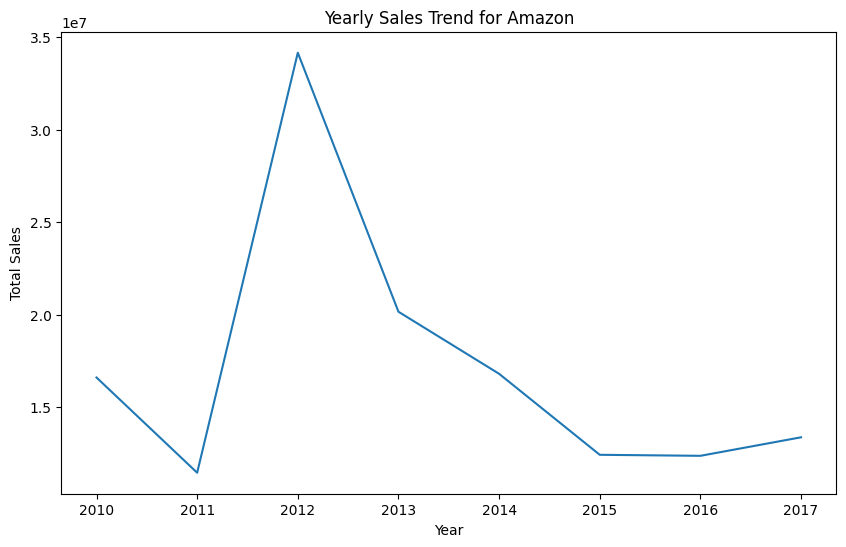

In [ ]:
# prompt: Using dataframe df_amazon: yearly trend analysis

import pandas as pd
import matplotlib.pyplot as plt

df_amazon_year = df_amazon.groupby('Year')['Total Sales'].sum()

plt.figure(figsize=(10, 6))
plt.plot(df_amazon_year.index, df_amazon_year.values)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Yearly Sales Trend for Amazon')
plt.show()


Yearly Trend Analysis

In [ ]:
Yearly_sales=df_amazon.groupby("Year")["Total Sales"].sum()

In [ ]:
Yearly_sales

Year
2010    16604238.53
2011    11459719.49
2012    34149877.49
2013    20156772.41
2014    16803890.68
2015    12427982.86
2016    12372867.22
2017    13373419.63
Name: Total Sales, dtype: float64

In [ ]:
Yearly_sales = Yearly_sales.reset_index().reindex(df.index).set_index('Year')

In [ ]:
Yearly_sales

,Total Sales
Year,
2010.0,16604238.53
2011.0,11459719.49
2012.0,34149877.49
2013.0,20156772.41
2014.0,16803890.68
...,...
NaN,NaN
NaN,NaN
NaN,NaN


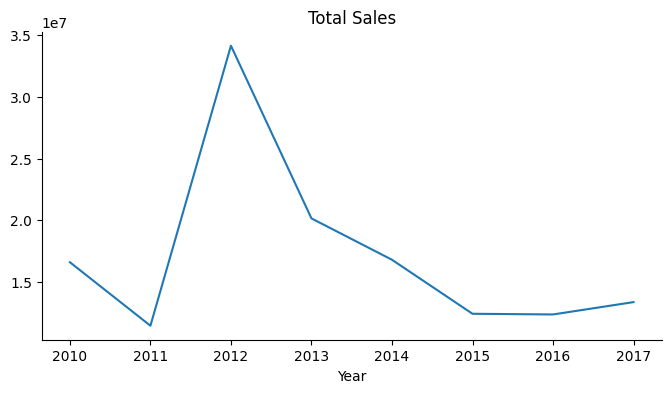

In [ ]:
from matplotlib import pyplot as plt
Yearly_sales['Total Sales'].plot(kind='line', figsize=(8, 4), title='Total Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

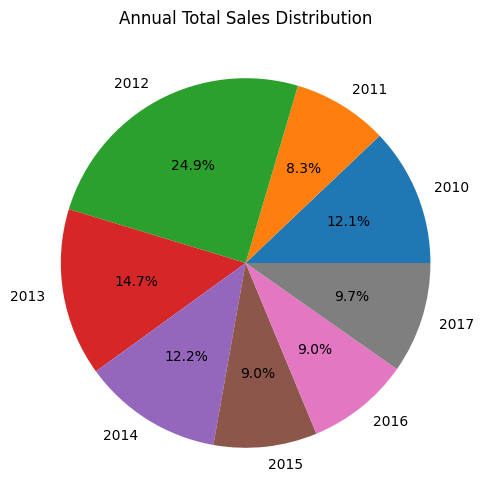

In [ ]:


# Create a dictionary with year as key and total sales as value
yearly_sales = df_amazon.groupby('Year')['Total Sales'].sum().to_dict()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(list(yearly_sales.values()), labels=list(yearly_sales.keys()), autopct='%1.1f%%')
plt.title('Annual Total Sales Distribution')
plt.show()


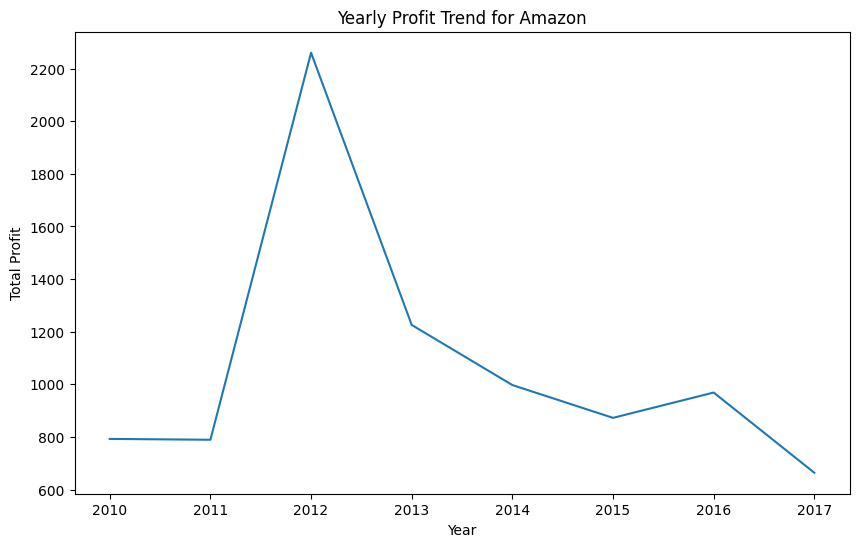

In [ ]:
#  yearly profit

df_amazon_year_profit = df_amazon.groupby('Year')['Unit Margin'].sum()

plt.figure(figsize=(10, 6))
plt.plot(df_amazon_year_profit.index, df_amazon_year_profit.values)
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Yearly Profit Trend for Amazon')
plt.show()


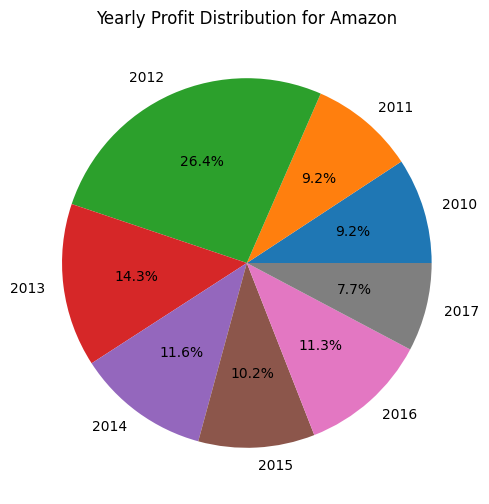

In [ ]:
# prompt: yearly profit on piechart

df_amazon_year_profit = df_amazon.groupby('Year')['Unit Margin'].sum()
plt.figure(figsize=(8, 6))
plt.pie(df_amazon_year_profit, labels=df_amazon_year_profit.index, autopct='%1.1f%%')
plt.title('Yearly Profit Distribution for Amazon')
plt.show()


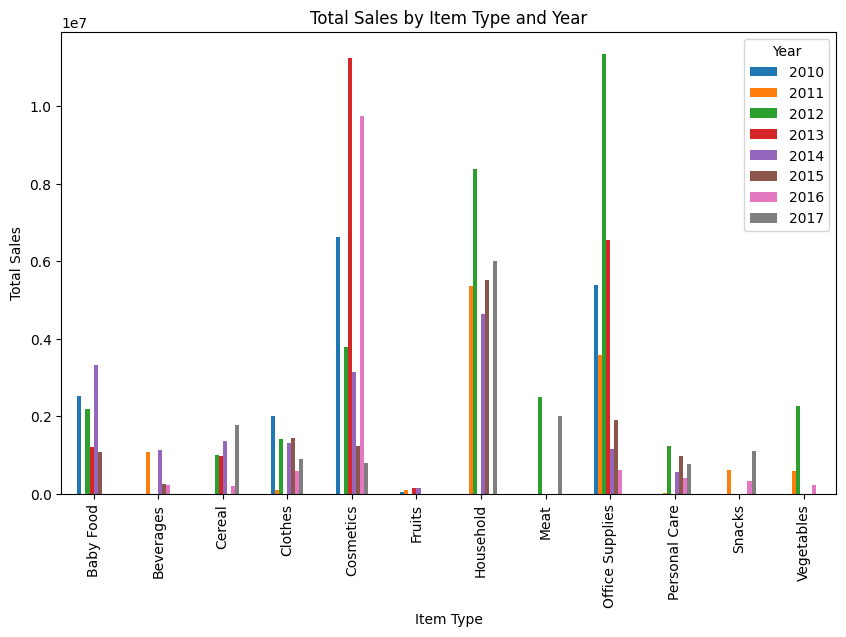

In [ ]:


# Create a crosstab of Item Type and Year
item_type_year_sales = pd.crosstab(df_amazon["Item Type"], df_amazon["Year"], values=df_amazon["Total Sales"], aggfunc="sum")

# Plot the crosstab as a bar chart
item_type_year_sales.plot(kind="bar", figsize=(10, 6))
plt.xlabel("Item Type")
plt.ylabel("Total Sales")
plt.title("Total Sales by Item Type and Year")
plt.show()


Maximum item contribution in top sales year

In [ ]:


# Find the year with the highest total sales
top_sales_year = df_amazon["Year"].value_counts().index[0]

# Filter the data for the top sales year
df_top_year = df_amazon[df_amazon["Year"] == top_sales_year]

# Group the data by Item Type and calculate the sum of Total Sales
item_contribution = df_top_year.groupby("Item Type")["Total Sales"].sum().sort_values(ascending=False)

# Get the item with the maximum contribution
max_contribution_item = item_contribution.index[0]

# Print the result
print(f"Maximum item contribution in the top sales year ({top_sales_year}): {max_contribution_item}")



Maximum item contribution in the top sales year (2012): Office Supplies


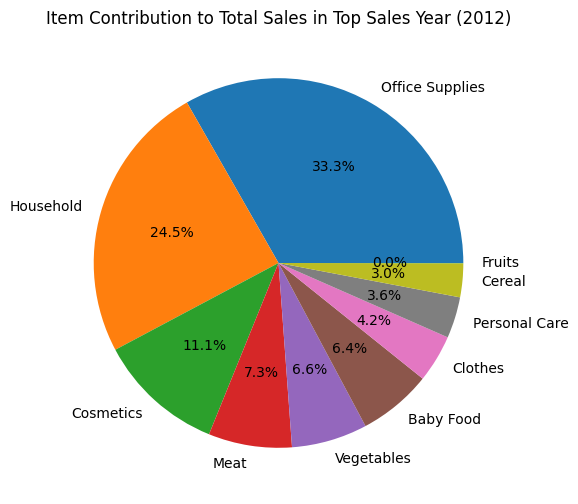

In [ ]:
#  maximum item contribution in top sales year piechart

# Calculate the percentage contribution of each item type to the total sales in the top sales year
item_contribution_percentage = (item_contribution / item_contribution.sum()) * 100

# Create a pie chart to visualize the percentage contributions
plt.figure(figsize=(8, 6))
plt.pie(item_contribution_percentage, labels=item_contribution_percentage.index, autopct="%1.1f%%")
plt.title("Item Contribution to Total Sales in Top Sales Year ({})".format(top_sales_year))
plt.show()


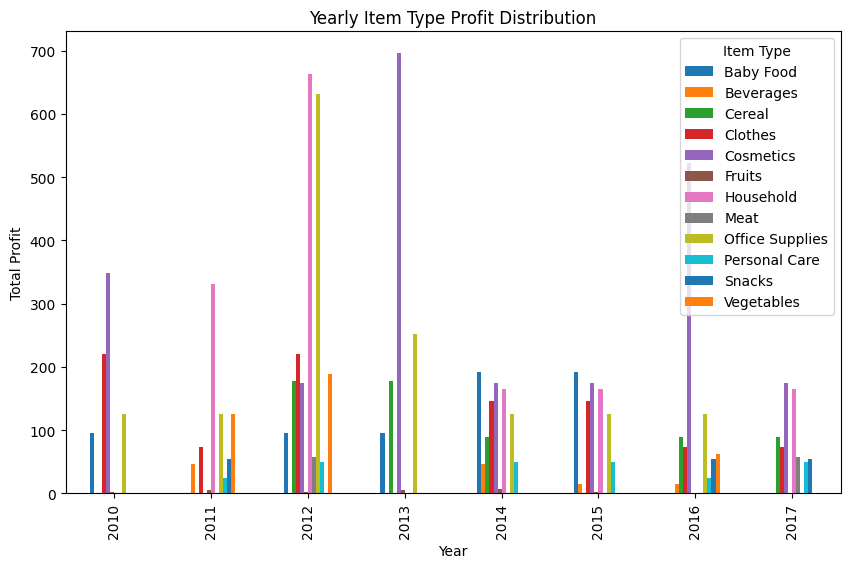

In [ ]:
#  yearly item type sold with total profit barplot

# Group the data by year and item type and calculate the sum of unit margin
item_profit_year = df_amazon.groupby(["Year", "Item Type"])["Unit Margin"].sum().reset_index()

# Pivot the data to have item types as columns and years as rows
item_profit_year_pivot = item_profit_year.pivot(index="Year", columns="Item Type", values="Unit Margin")

# Plot the data as a bar plot
item_profit_year_pivot.plot(kind="bar", figsize=(10, 6))
plt.xlabel("Year")
plt.ylabel("Total Profit")
plt.title("Yearly Item Type Profit Distribution")
plt.show()


Monthly Trend Analysis

In [ ]:
df_amazon["Ship Date"].dt.strftime("%b")
Monthly_sales=df_amazon.groupby("Month")["Total Sales"].sum()
Monthly_sales

Month
1      8884502.45
2     21105331.41
3     11322021.69
4      7402746.81
5     11945263.42
6     12019913.42
7      6016768.51
8     11050846.65
9      4188045.51
10     5314762.56
11    19528983.79
12    18569582.09
Name: Total Sales, dtype: float64

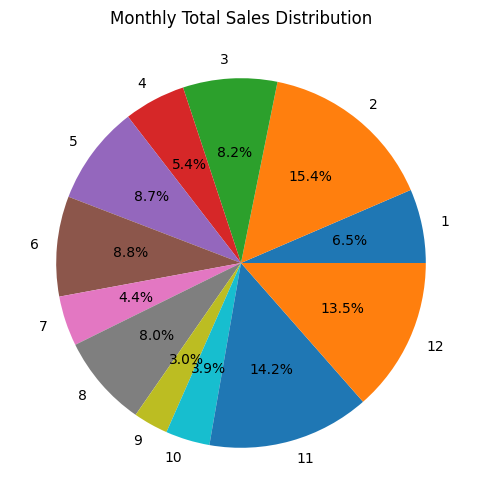

In [ ]:

# Create a dictionary with month as key and total sales as value
monthly_sales_dict = Monthly_sales.to_dict()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(list(monthly_sales_dict.values()), labels=list(monthly_sales_dict.keys()), autopct='%1.1f%%')
plt.title('Monthly Total Sales Distribution')
plt.show()


In [ ]:
#  get the item type that got sold highest in the months

# Get the item type with the highest total sales for each month
highest_sales_item_per_month = {}
for month in Monthly_sales.index:
  month_data = df_amazon[df_amazon["Month"] == month]
  highest_sales_item = month_data.groupby("Item Type")["Total Sales"].sum().sort_values(ascending=False).index[0]
  highest_sales_item_per_month[month] = highest_sales_item

# Print the results
for month, item in highest_sales_item_per_month.items():
  print(f"Month: {month}, Highest Selling Item: {item}")


Month: 1, Highest Selling Item: Office Supplies
Month: 2, Highest Selling Item: Household
Month: 3, Highest Selling Item: Household
Month: 4, Highest Selling Item: Cosmetics
Month: 5, Highest Selling Item: Office Supplies
Month: 6, Highest Selling Item: Baby Food
Month: 7, Highest Selling Item: Office Supplies
Month: 8, Highest Selling Item: Cosmetics
Month: 9, Highest Selling Item: Meat
Month: 10, Highest Selling Item: Cosmetics
Month: 11, Highest Selling Item: Office Supplies
Month: 12, Highest Selling Item: Cosmetics


In [ ]:
#   top 3 months got highest sales

# Get the top 3 months with the highest sales
top_3_months = Monthly_sales.sort_values(ascending=False).head(3).index

# Print the results
print("Top 3 months with highest sales:")
for month in top_3_months:
  print(f"\t- {month}")


Top 3 months with highest sales:
	- 2
	- 11
	- 12


Frequency of items in top 3 sales months

<Axes: title={'center': 'February Most frequently ordered Item'}, xlabel='Item Type'>

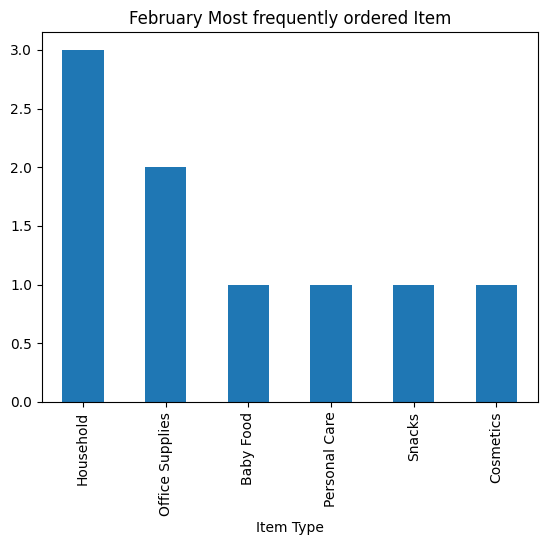

In [ ]:
df_amazon[df_amazon["Month"]==2]["Item Type"].value_counts().plot(kind="bar",title="February Most frequently ordered Item")

<Axes: title={'center': 'November Most frequently ordered Item'}, xlabel='Item Type'>

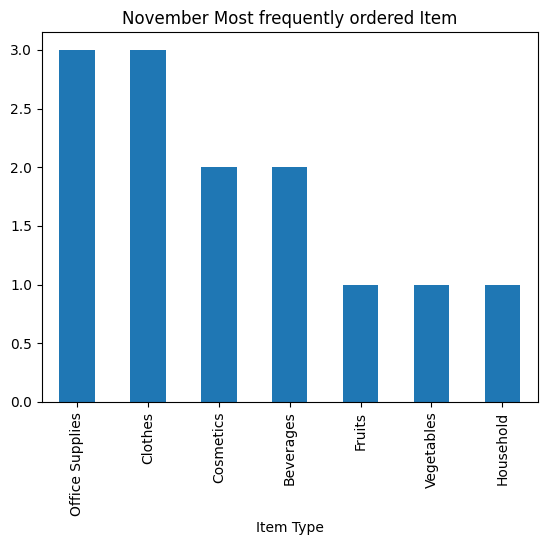

In [ ]:
df_amazon[df_amazon["Month"]==11]["Item Type"].value_counts().plot(kind="bar",title="November Most frequently ordered Item")

<Axes: title={'center': 'December Most frequently ordered Item'}, xlabel='Item Type'>

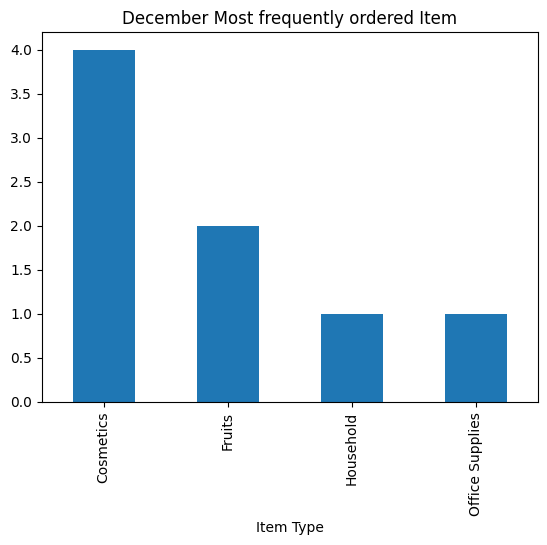

In [ ]:
df_amazon[df_amazon["Month"]==12]["Item Type"].value_counts().plot(kind="bar",title="December Most frequently ordered Item")

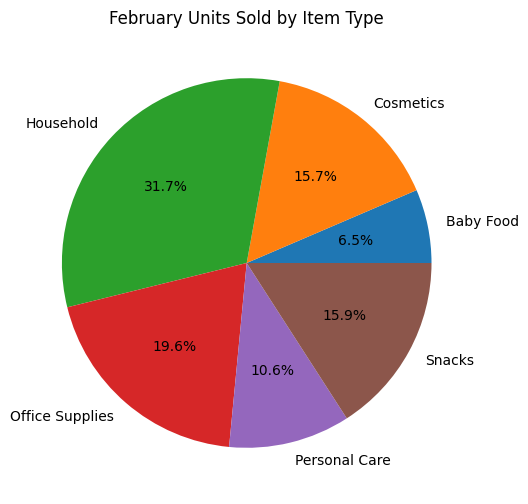

In [ ]:


import matplotlib.pyplot as plt

# Get the data for February
february_data = df_amazon[df_amazon["Month"] == 2]

# Group the data by Item Type and calculate the sum of Units Sold
february_units_sold = february_data.groupby("Item Type")["Units Sold"].sum()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(february_units_sold, labels=february_units_sold.index, autopct="%1.1f%%")
plt.title("February Units Sold by Item Type")
plt.show()


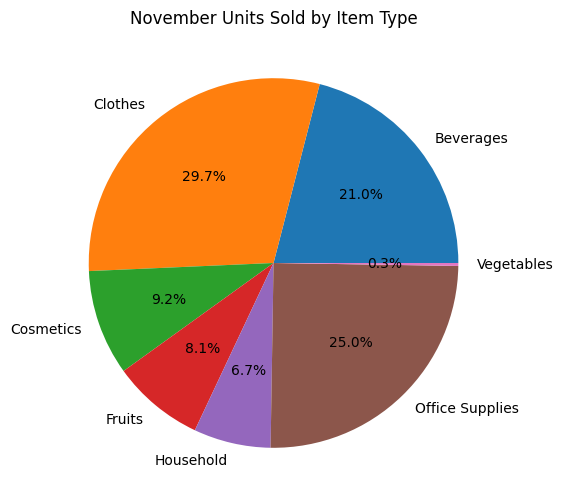

In [ ]:


# Get the data for November
november_data = df_amazon[df_amazon["Month"] == 11]

# Group the data by Item Type and calculate the sum of Units Sold
november_units_sold = november_data.groupby("Item Type")["Units Sold"].sum()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(november_units_sold, labels=november_units_sold.index, autopct="%1.1f%%")
plt.title("November Units Sold by Item Type")
plt.show()


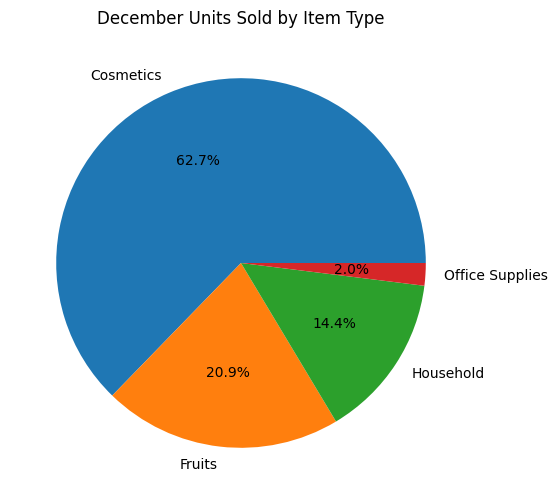

In [ ]:
# prompt: December units sold piechart

# Get the data for December
december_data = df_amazon[df_amazon["Month"] == 12]

# Group the data by Item Type and calculate the sum of Units Sold
december_units_sold = december_data.groupby("Item Type")["Units Sold"].sum()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(december_units_sold, labels=december_units_sold.index, autopct="%1.1f%%")
plt.title("December Units Sold by Item Type")
plt.show()


In [ ]:
Monthly_sales_data.reset_index()["Item Type"].value_counts()

Item Type
Cosmetics          8
Clothes            7
Household          7
Cereal             6
Fruits             6
Office Supplies    6
Personal Care      6
Baby Food          5
Beverages          5
Vegetables         5
Snacks             3
Meat               2
Name: count, dtype: int64

<Axes: title={'center': 'Most frequently ordered items(>2)'}, xlabel='Month,Item Type'>

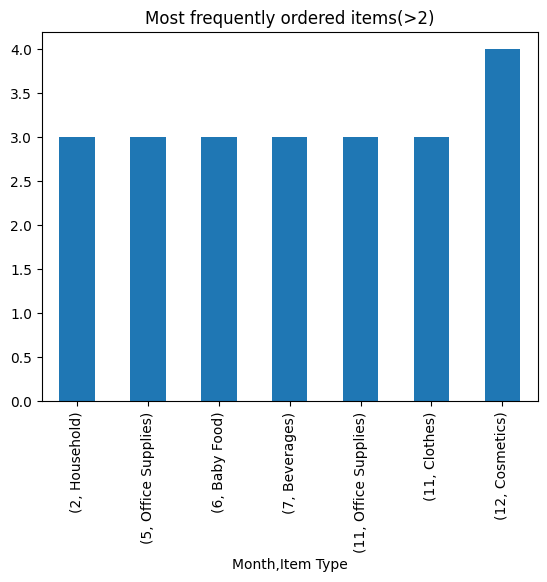

In [ ]:
_A=df_amazon.groupby("Month")['Item Type'].value_counts()
_A[_A>2].plot(kind="bar",title="Most frequently ordered items(>2)")

Month-Yearly trend analysis

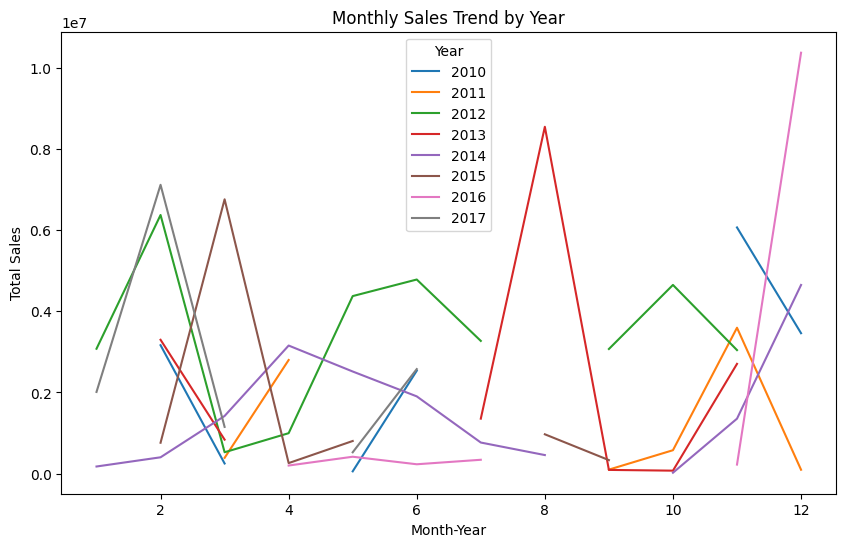

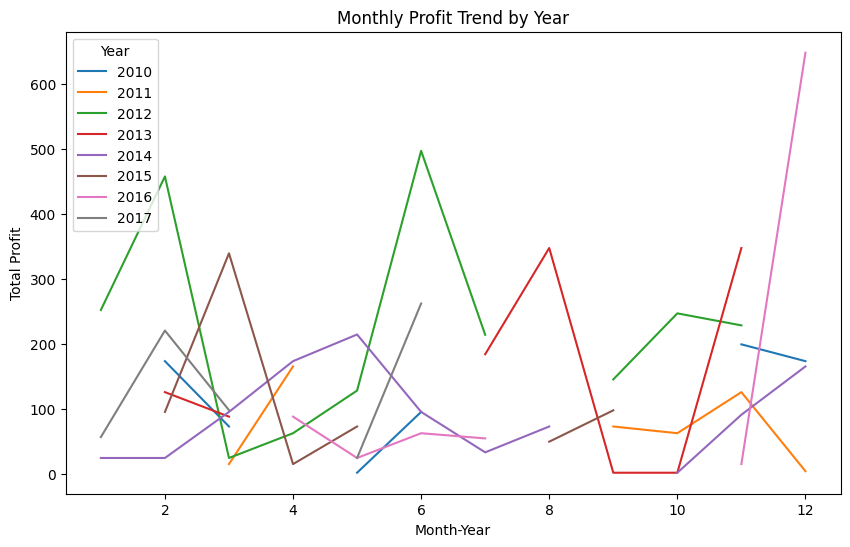

In [ ]:
#  month yearly sales and profit plot

# Create a crosstab of Month and Year with Total Sales as values
monthly_sales_year = pd.crosstab(df_amazon["Month"], df_amazon["Year"], values=df_amazon["Total Sales"], aggfunc="sum")

# Plot the crosstab as a line chart
monthly_sales_year.plot(kind="line", figsize=(10, 6))
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend by Year")
plt.show()

# Create a crosstab of Month and Year with Unit Margin as values
monthly_profit_year = pd.crosstab(df_amazon["Month"], df_amazon["Year"], values=df_amazon["Unit Margin"], aggfunc="sum")

# Plot the crosstab as a line chart
monthly_profit_year.plot(kind="line", figsize=(10, 6))
plt.xlabel("Month-Year")
plt.ylabel("Total Profit")
plt.title("Monthly Profit Trend by Year")
plt.show()


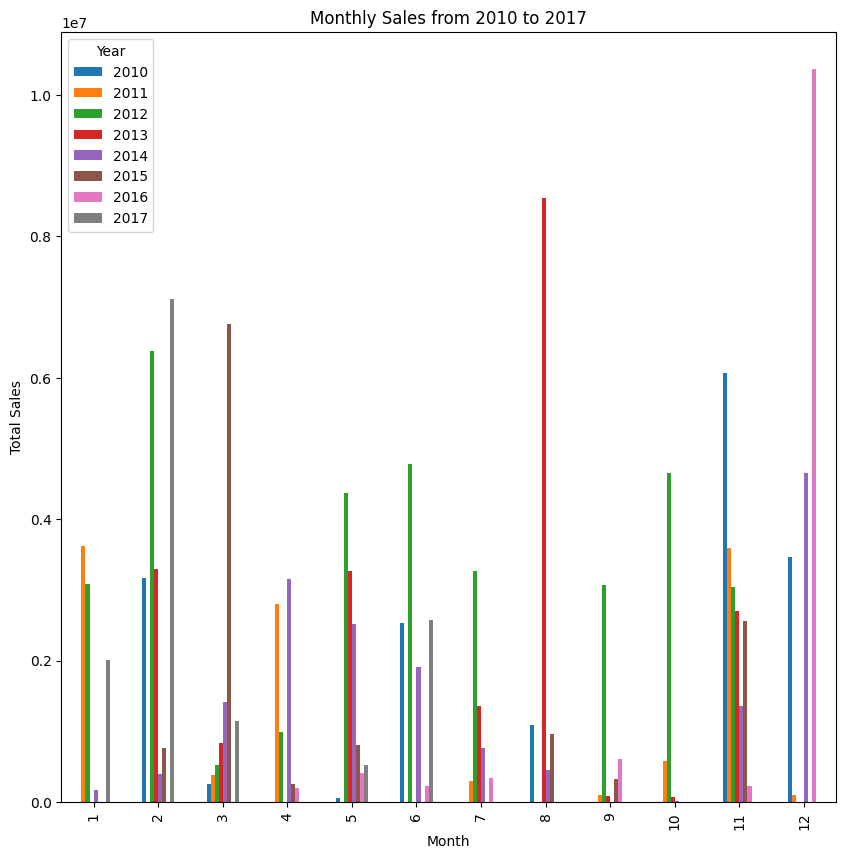

In [ ]:
# prompt: month -yearly sales from 2010 to 2017 and january to december barplot

# Group the data by month and year, and calculate the sum of total sales
monthly_sales_year = df_amazon.groupby(["Month", "Year"])["Total Sales"].sum().unstack()

# Create a bar plot of the monthly sales for each year
monthly_sales_year.plot(kind="bar", figsize=(10,10))
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales from 2010 to 2017")
plt.legend(title="Year")
plt.show()


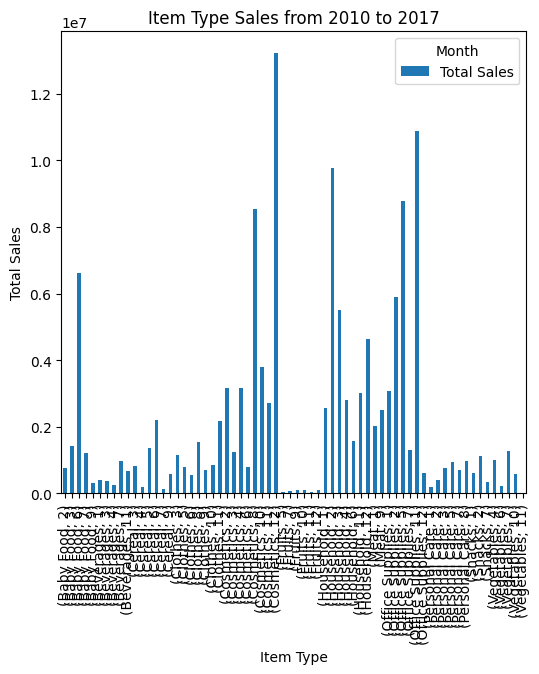

In [ ]:
My_sum_data=df_amazon.groupby(["Item Type","Month"])["Total Sales"].sum()
My_sum_data.plot(kind="bar", figsize=(6,6))
plt.xlabel("Item Type")
plt.ylabel("Total Sales")
plt.title("Item Type Sales from 2010 to 2017")
plt.legend(title="Month")
plt.show()

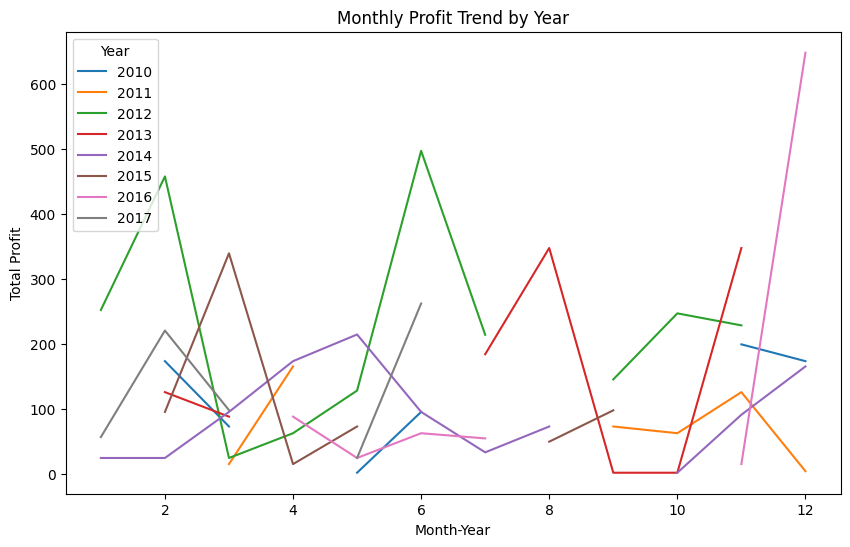

In [ ]:
# prompt: plot of the month-yearly profit

# Create a crosstab of Month and Year with Unit Margin as values
monthly_profit_year = pd.crosstab(df_amazon["Month"], df_amazon["Year"], values=df_amazon["Unit Margin"], aggfunc="sum")

# Plot the crosstab as a line chart
monthly_profit_year.plot(kind="line", figsize=(10, 6))
plt.xlabel("Month-Year")
plt.ylabel("Total Profit")
plt.title("Monthly Profit Trend by Year")
plt.show()


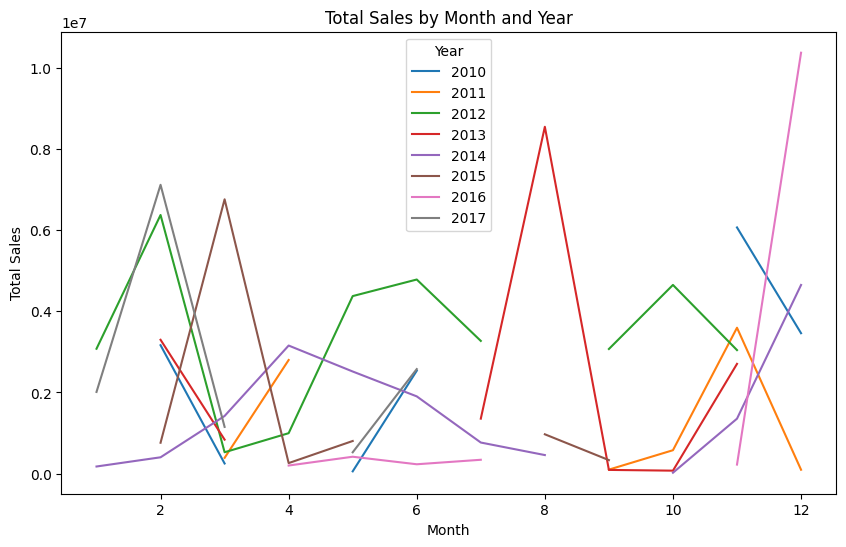

In [ ]:
# prompt: total sales of month-yearly plot

# Group the data by month and year, and calculate the sum of total sales
monthly_sales_year = df_amazon.groupby(["Month", "Year"])["Total Sales"].sum().unstack()

# Plot the monthly sales for each year as a line chart
monthly_sales_year.plot(kind="line", figsize=(10, 6))
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Total Sales by Month and Year")
plt.show()


In [ ]:
# prompt: every year which month has the hidhest sales table

import pandas as pd

# Create a crosstab of Month and Year with Total Sales as values
monthly_sales_year = pd.crosstab(df_amazon["Month"], df_amazon["Year"], values=df_amazon["Total Sales"], aggfunc="sum")

# Find the month with the highest sales for each year
max_sales_month_year = {}
for year in monthly_sales_year.columns:
  max_sales_month = monthly_sales_year[year].idxmax()
  max_sales_month_year[year] = max_sales_month

# Create a DataFrame to display the results
df_max_sales_month_year = pd.DataFrame.from_dict(max_sales_month_year, orient="index", columns=["Highest Sales Month"])

# Print the DataFrame
print(df_max_sales_month_year.to_string())


      Highest Sales Month
2010                   11
2011                    1
2012                    2
2013                    8
2014                   12
2015                    3
2016                   12
2017                    2


      Highest Profit Month
2010                    11
2011                     1
2012                     6
2013                     8
2014                     5
2015                     3
2016                    12
2017                     6


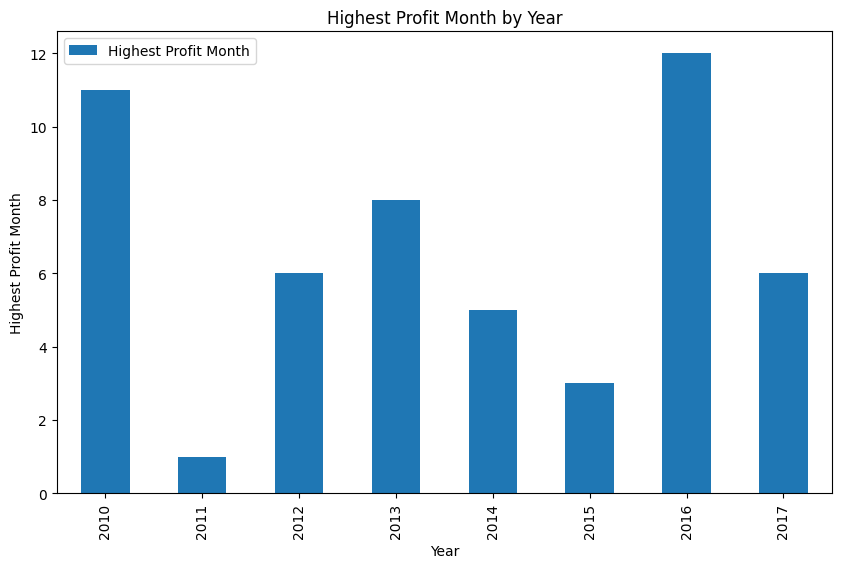

In [ ]:
# prompt: which month has the highest profit in every year plot

# Group the data by month and year, and calculate the sum of unit margin
monthly_profit_year = df_amazon.groupby(["Month", "Year"])["Unit Margin"].sum().unstack()

# Find the month with the highest profit for each year
max_profit_month_year = {}
for year in monthly_profit_year.columns:
  max_profit_month = monthly_profit_year[year].idxmax()
  max_profit_month_year[year] = max_profit_month

# Create a DataFrame to display the results
df_max_profit_month_year = pd.DataFrame.from_dict(max_profit_month_year, orient="index", columns=["Highest Profit Month"])

# Print the DataFrame
print(df_max_profit_month_year.to_string())

# Plot the highest profit month for each year
df_max_profit_month_year.plot(kind="bar", figsize=(10, 6))
plt.xlabel("Year")
plt.ylabel("Highest Profit Month")
plt.title("Highest Profit Month by Year")
plt.show()


In [ ]:
# prompt: on which product the sales and profit is high in  month in the year

# Find the month with the highest sales and profit for each year
highest_sales_month_year = {}
highest_profit_month_year = {}
for year in monthly_sales_year.columns:
  # Highest sales
  highest_sales_month = monthly_sales_year[year].idxmax()
  highest_sales_product = df_amazon[(df_amazon["Month"] == highest_sales_month) & (df_amazon["Year"] == year)]["Item Type"].value_counts().index[0]
  highest_sales_month_year[year] = {"Month": highest_sales_month, "Product": highest_sales_product}
  # Highest profit
  highest_profit_month = monthly_profit_year[year].idxmax()
  highest_profit_product = df_amazon[(df_amazon["Month"] == highest_profit_month) & (df_amazon["Year"] == year)]["Item Type"].value_counts().index[0]
  highest_profit_month_year[year] = {"Month": highest_profit_month, "Product": highest_profit_product}

# Create DataFrames for highest sales and profit products
df_highest_sales_product = pd.DataFrame.from_dict(highest_sales_month_year, orient="index", columns=["Month", "Product"])
df_highest_profit_product = pd.DataFrame.from_dict(highest_profit_month_year, orient="index", columns=["Month", "Product"])

# Print the DataFrames
print("Highest Sales Product by Month and Year:")
print(df_highest_sales_product.to_string())
print("\nHighest Profit Product by Month and Year:")
print(df_highest_profit_product.to_string())


Highest Sales Product by Month and Year:
      Month    Product
2010     11    Clothes
2011      1  Household
2012      2  Household
2013      8  Cosmetics
2014     12  Household
2015      3  Household
2016     12  Cosmetics
2017      2  Household

Highest Profit Product by Month and Year:
      Month          Product
2010     11          Clothes
2011      1        Household
2012      6          Clothes
2013      8        Cosmetics
2014      5  Office Supplies
2015      3        Household
2016     12        Cosmetics
2017      6        Cosmetics


                 Highest Sales Month
Baby Food                          6
Beverages                          7
Cereal                             6
Clothes                           11
Cosmetics                         12
Fruits                             9
Household                          2
Meat                               9
Office Supplies                   11
Personal Care                      8
Snacks                             2
Vegetables                         7
                 Highest Profit Month
Baby Food                           6
Beverages                           7
Cereal                              6
Clothes                            11
Cosmetics                          12
Fruits                              5
Household                           2
Meat                                1
Office Supplies                     5
Personal Care                       1
Snacks                              1
Vegetables                          7


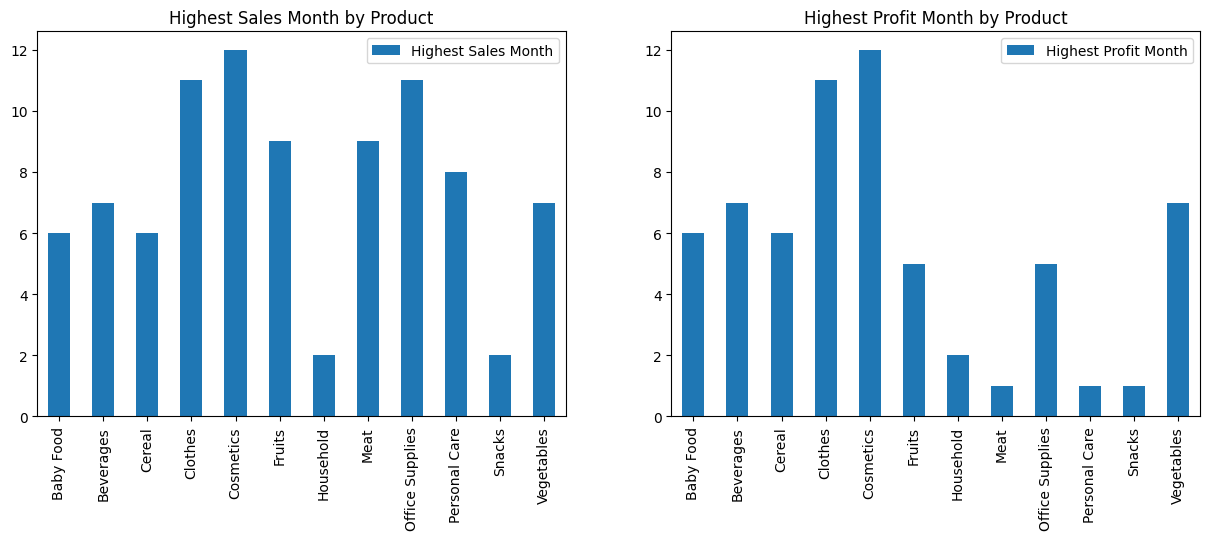

In [ ]:
# prompt: on which product the sales and profit is high in  month in the year  plot

# Create a crosstab of Month and Product with Total Sales as values
monthly_sales_product = pd.crosstab(df_amazon["Month"], df_amazon["Item Type"], values=df_amazon["Total Sales"], aggfunc="sum")

# Find the month with the highest sales for each product
max_sales_month_product = {}
for product in monthly_sales_product.columns:
  max_sales_month = monthly_sales_product[product].idxmax()
  max_sales_month_product[product] = max_sales_month

# Create a DataFrame to display the results
df_max_sales_month_product = pd.DataFrame.from_dict(max_sales_month_product, orient="index", columns=["Highest Sales Month"])

# Print the DataFrame
print(df_max_sales_month_product.to_string())

# Create a crosstab of Month and Product with Unit Margin as values
monthly_profit_product = pd.crosstab(df_amazon["Month"], df_amazon["Item Type"], values=df_amazon["Unit Margin"], aggfunc="sum")

# Find the month with the highest profit for each product
max_profit_month_product = {}
for product in monthly_profit_product.columns:
  max_profit_month = monthly_profit_product[product].idxmax()
  max_profit_month_product[product] = max_profit_month

# Create a DataFrame to display the results
df_max_profit_month_product = pd.DataFrame.from_dict(max_profit_month_product, orient="index", columns=["Highest Profit Month"])

# Print the DataFrame
print(df_max_profit_month_product.to_string())

# Plot the highest sales and profit month for each product
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
df_max_sales_month_product.plot(kind="bar", ax=axes[0], title="Highest Sales Month by Product")
df_max_profit_month_product.plot(kind="bar", ax=axes[1], title="Highest Profit Month by Product")
plt.show()
